[[-3.         -2.        ]
 [-1.46446609 -1.46446609]
 [-1.         -2.        ]] [-3.46446609 -1.46446609]
case 1 simplex  [[-3.         -2.        ]
 [-1.46446609 -1.46446609]
 [-1.         -2.        ]]
case 1 :: f(B) > f(R)
case 1 :: f(E) < f(B)
case 1 result simplex  [[-2.84834957 -1.59834957]
 [-3.         -2.        ]
 [-1.46446609 -1.46446609]]
[[-2.84834957 -1.59834957]
 [-3.         -2.        ]
 [-1.46446609 -1.46446609]] [-4.38388348 -2.13388348]
-96.71991297527109 -9.528671146507932 iteration 1
case_2  :: f(R) < f(W)
case_2  :: f(С1) < f(W)
[[-2.84834957 -1.59834957]
 [-3.         -2.        ]
 [-3.65402913 -1.96652913]] [-2.19432044 -1.63182044]
-96.71991297527109 -43.59360763421433 iteration 2
case_2  :: f(С1) < f(W)
[[-2.84834957 -1.59834957]
 [-3.28910196 -1.88285196]
 [-3.         -2.        ]] [-3.13745153 -1.48120153]
-96.71991297527109 -105.36371727228715 iteration 3
case 1 simplex  [[-2.84834957 -1.59834957]
 [-3.28910196 -1.88285196]
 [-3.         -2.        ]]
c

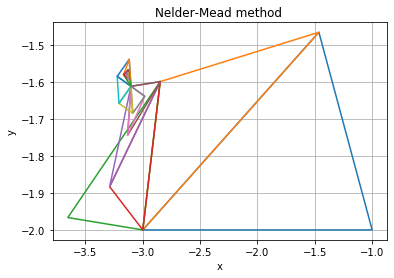

In [172]:
import cvxpy as cp
import numpy as np
from math import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

eps = 1e-6
refl, expan, contr = 1, 0.5, 2

def function(x: float,y : float) -> float:
    return sin(y) * np.e**((1-cos(x))**2) + cos(x)* np.e**((1-sin(y))**2) + (x-y)**2

constraints = lambda x,y: ((x+5)**2 + (y+5)**2) < 25 

def func_ar(ar: np.array):
    return function (ar[0], ar[1])

#  Nelder-Mead method 

def sort_simplex (simplex : np.array):
    simplex = list (simplex)
    simplex.sort( key=lambda entry: function(entry[0], entry[1]))
    return np.array(simplex)

def case_1 (simplex : np.array, r_point : np.array):
    print ('case 1 simplex ' , simplex)
    midpoint = (simplex[0] + simplex[1])/2
    if(func_ar(simplex[0]) < func_ar(r_point)): 
        simplex[2] = r_point
        print('case 1 :: f(B) < f(R)')
    else: 
        e_point = refine_coord(midpoint + expan * (r_point - midpoint))  
        print('case 1 :: f(B) > f(R)')
        if (func_ar(e_point) < func_ar(simplex[0])): 
            simplex[2] = e_point
            print('case 1 :: f(E) < f(B)')
        else: 
            simplex[2] = r_point
            print('case 1 :: f(E) > f(B)')
    sorted_simplex = sort_simplex(simplex)
    print ('case 1 result simplex ' , sorted_simplex)
    return sorted_simplex

# either contract or shrink
def case_2 (simplex : np.array, r_point : np.array):
    midpoint = (simplex[0] + simplex[1])/2
    if(func_ar(r_point) < func_ar(simplex[2])):
        simplex[2] = r_point
        print('case_2  :: f(R) < f(W)')
    c1 = midpoint - (midpoint - simplex[2])/2
    c2 = midpoint + (midpoint - simplex[2])/2
    if (func_ar(c1) < func_ar(simplex[2])): 
        simplex[2] = c1
        print('case_2  :: f(С1) < f(W)')
    elif (func_ar(c2) < func_ar(simplex[2])):
        simplex[2] = c2
        print('case_2  :: f(С2) < f(W)')
    else : #Shrink towards B
        print('case_2  :: shrink')
        simplex[1] = simplex[0] - (simplex[0] - simplex[1])/2
        simplex[2] = simplex[0] - (simplex[0] - simplex[2])/2
    sorted_simplex =   sort_simplex(simplex)      
    return sorted_simplex
 
# checks that func arguments are within given restrictions
def refine_coord (x : np.array):
    if (not constraints(x[0],x[1])):
        vector = x - np.array([-5,-5])
        length = sqrt(vector[0]**2 + vector[1]**2)+eps
        x = np.array([-5,-5]) + 5 * vector /np.linalg.norm(vector)
    return x
           

step = 0
eps = 1e-6
#initial simlex
simplex = list([(-1.0,-1.0),(-1.0,-2.0), (-3.0,-2.0)])
simplex.sort( key=lambda entry: function(entry[0], entry[1]))
simplex = np.array(simplex)
for x in range(3): simplex[x] = refine_coord(simplex[x])
results = []
for x in range(3): results.append(function(simplex[x][0],simplex[x][1]))


midpoint = (simplex[0] + simplex[1])/2
#Reflection Using the Point R
r_point = refine_coord(midpoint + refl*(midpoint - simplex[2]))

fig, ax = plt.subplots()
print (simplex , r_point)
plt.plot([simplex[0][0],simplex[1][0],simplex[2][0], simplex[0][0]],
             [simplex[0][1],simplex[1][1],simplex[2][1],simplex[0][1]])

while (np.linalg.norm(simplex[0] - simplex[1])>eps and step<100):
    if (func_ar(r_point) < func_ar(simplex[1])) :
        simplex = case_1(simplex, r_point)
    else: 
        simplex = case_2(simplex, r_point)
    midpoint = (simplex[0] + simplex[1])/2
    r_point = refine_coord(midpoint + refl *(midpoint - simplex[2]))
    step+=1
    print (simplex , r_point)
    print (func_ar(simplex[0]) ,func_ar(r_point), 'iteration',step )
    plt.plot([simplex[0][0],simplex[1][0],simplex[2][0], simplex[0][0]],
             [simplex[0][1],simplex[1][1],simplex[2][1],simplex[0][1]])

ax.set(xlabel='x', ylabel='y',
       title='Nelder-Mead method ')
ax.grid()
plt.show()    

    



In [169]:
import numpy as np

a= np.array([1,1])
print (np.linalg.norm(a))


1.4142135623730951
